# CommerceTools Dataset 
Mohit Nalavadi

22.3.2018

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline 

In [2]:
raw_df = pd.read_csv('data.csv')
df = raw_df.copy()
df = df.drop(df.columns[0], axis=1)
print (df.shape)
df.head()

(533352, 8)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 8:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 8:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 8:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 8:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 8:26:00,3.39,17850.0,United Kingdom


## A Quick Look at the Distributions

In [3]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,533352.000000,533352.000000,398338.000000
mean,9.498361,4.604411,15343.318998
std,219.806458,97.006396,1687.933288
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,14049.000000
50%,3.000000,2.080000,15240.000000
75%,10.000000,4.130000,16814.000000
max,80995.000000,38970.000000,18287.000000


### Things to note: 

- negative quantities
- negative unit prices

In [4]:
# quick look at the distributions 

print ('unique entries per feature')
for col in df.columns:
    unique = df[col].unique()
    print (col, len(unique))

unique entries per feature
InvoiceNo 25439
StockCode 4069
Description 4223
Quantity 721
InvoiceDate 22881
UnitPrice 1624
CustomerID 4286
Country 37


In [5]:
print ('NaN/null value count')
df.shape[0] - df.count()

NaN/null value count


InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135014
Country             0
dtype: int64

## Craft a few extra features 

In [6]:
# create date features 

df['InvoiceDate_'] = pd.DatetimeIndex(df.InvoiceDate)

def year(x): return x.year
def month(x): return x.month
def week(x): return x.week
def day(x): return x.day
def hour(x): return x.hour
def minute(x): return x.minute
def day_of_week(x) : return x.weekday()

df['year'] = df.InvoiceDate_.apply(year)
df['month'] = df.InvoiceDate_.apply(month)
df['week'] = df.InvoiceDate_.apply(week)
df['day'] = df.InvoiceDate_.apply(day)
df['hour'] = df.InvoiceDate_.apply(hour)
# df['minute'] = df.InvoiceDate_.apply(minute)
df['day_of_week'] = df.InvoiceDate_.apply(day_of_week)
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceDate_,year,month,week,day,hour,day_of_week
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 8:26:00,2.55,17850.0,United Kingdom,2010-12-01 08:26:00,2010,12,48,1,8,2
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 8:26:00,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,2010,12,48,1,8,2
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 8:26:00,2.75,17850.0,United Kingdom,2010-12-01 08:26:00,2010,12,48,1,8,2
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 8:26:00,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,2010,12,48,1,8,2
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 8:26:00,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,2010,12,48,1,8,2


In [7]:
# get the total amount that was spent in the transaction 

def total_spent(x): 
    return x['Quantity'] * x['UnitPrice']
    
df['total_spent'] = df.apply(total_spent, axis=1)

In [8]:
df.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceDate_,year,month,week,day,hour,day_of_week,total_spent
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 8:26:00,2.55,17850.0,United Kingdom,2010-12-01 08:26:00,2010,12,48,1,8,2,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 8:26:00,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,2010,12,48,1,8,2,20.34


# Cleaning up the dataset 

Well formatted dataset, but a few questions: 

- **Why are there multiple Descriptions for the same StockCode**
- **Why are there negative quantities and 0.0 UnitPrices?** 

------

### Next task: 
- examine the multiple Description entries for the unique stock codes
- remove all non-positive/zero quantities and prices.  

In [9]:
max_cols = 9

# get unique stock codes and their unique product descriptions 
d = {}
for code in df.StockCode.unique(): 
    d[code] = list(df.Description[df.StockCode == code].unique())
    
    # format for a pandas dataframe - same size lists 
    missing_cols = max_cols-len(d[code])
    d[code] = d[code] + ['-']*missing_cols
    
test = pd.DataFrame(d).T

In [10]:
test.sort_values(by=3, ascending=False).head()

,0,1,2,3,4,5,6,7,8
85175,CACTI T-LIGHT CANDLES,Amazon sold sets,dotcom sold sets,wrongly sold sets,? sold as sets?,check,NaN,-,-
20713,JUMBO BAG OWLS,NaN,wrongly marked. 23343 in box,wrongly coded-23343,found,Found,wrongly marked 23343,Marked as 23343,wrongly coded 23343
22719,GUMBALL MONOCHROME COAT RACK,wrong barcode (22467),sold as 22467,wrong code,NaN,-,-,-,-
21621,VINTAGE UNION JACK BUNTING,?,rcvd be air temp fix for dotcom sit,re dotcom quick fix.,NaN,-,-,-,-
84944,SET OF 6 KASHMIR FOLKART BAUBLES,found,NaN,michel oops,-,-,-,-,-


### Non straight-forward descriptions 

As we can see, for a given stock code, the main product description in column 0 is straight forward, but all the others are often notes about the purchase. This may be because those entries are returns. Examining a specific one, below, shows that the quantity, so the two issus may be linked. 

In [11]:
df[df.Description == 'found'].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceDate_,year,month,week,day,hour,day_of_week,total_spent
51099,540673,21644,found,144,2011-01-10 16:04:00,0.0,NaN,United Kingdom,2011-01-10 16:04:00,2011,1,2,10,16,0,0.0
130712,547673,47593A,found,13,2011-03-24 13:57:00,0.0,NaN,United Kingdom,2011-03-24 13:57:00,2011,3,12,24,13,3,0.0
164359,550950,17091A,found,84,2011-04-21 16:14:00,0.0,NaN,United Kingdom,2011-04-21 16:14:00,2011,4,16,21,16,3,0.0
239049,558369,21082,found,3,2011-06-28 15:40:00,0.0,NaN,United Kingdom,2011-06-28 15:40:00,2011,6,26,28,15,1,0.0
243087,558725,84944,found,37,2011-07-01 14:31:00,0.0,NaN,United Kingdom,2011-07-01 14:31:00,2011,7,26,1,14,4,0.0


In [12]:
# remove all non-positive quantity and price entries 
# then repeat the analysis  
non_returns = df[(df.UnitPrice > 0.0) & (df.Quantity > 0)]
non_returns.shape

(521697, 16)

In [13]:
# get unique stock codes and their unique product descriptions 
d = {}
for code in non_returns.StockCode.unique(): 
    d[code] = list(non_returns.Description[non_returns.StockCode == code].unique())
    
    # format for a pandas dataframe - same size lists 
    missing_cols = max_cols-len(d[code])
    d[code] = d[code] + ['-']*missing_cols
    
non_returns_check = pd.DataFrame(d).T

In [14]:
non_returns_check.sort_values(by=2, ascending=False).head()

,0,1,2,3,4,5,6,7,8
23231,WRAP DOILEY DESIGN,WRAP VINTAGE DOILEY,WRAP VINTAGE DOILY,-,-,-,-,-,-
23535,BICYCLE SAFTEY WALL ART,WALL ART BICYCLE SAFTEY,WALL ART BICYCLE SAFETY,-,-,-,-,-,-
22776,SWEETHEART CAKESTAND 3 TIER,"CAKESTAND, 3 TIER, LOVEHEART",SWEETHEART 3 TIER CAKE STAND,-,-,-,-,-,-
23236,DOILEY STORAGE TIN,DOILEY BISCUIT TIN,STORAGE TIN VINTAGE DOILEY,STORAGE TIN VINTAGE DOILY,-,-,-,-,-
23240,SET OF 4 KNICK KNACK TINS DOILEY,SET OF 4 KNICK KNACK TINS DOILY,SET OF 4 KNICK KNACK TINS DOILEY,-,-,-,-,-,-


## New assumption: 

By removing the non-positive entries, we also remove the description issue. So from here on out, we are making the assumption: 

### ** All negative and/or zero quantity and product prices are assumed to be returns. **

In [20]:
def returns(x):
    if x.Quantity <= 0 or x.UnitPrice <= 0: 
        return 1
    else: 
        return 0 

df['return'] = df.apply(returns, axis=1)

Below is a function, not totally necessary, but convinient for quick filtering of the features in the future. 

In [23]:
def filter_df(df = None, invoiceNos = None, stockCodes = None, max_quantity = None,
              min_quantity = None, early_date = None,late_date = None, month = None,
              max_price = None, min_price = None, max_spent = None, min_spent = None,
              countries = None, returns=True, dropnan=True
              ): 
    ''' 
    Function to filter a pandas dataframe. 
    
    Parameters
    ----------
        df :           pandas dataframe - to filter 
        invoiceNos :   list - of invoice numbers to keep. Default is None, which will keep all. 
        stockCodes:    list - of stock codes to keep. Default is None, which will keep all. 
        max_quantity : float - maximum quanitity of the order product. Default is None.
        min_quantity : float - minimum quanitity of the order product. Default is None.
        early_date :   datetime object - earlist date to keep. Default is None. 
        late_date :    datetime object - latest date to keep. Default is None. 
        month :        int - a specific month to look at (Jan = 1, Feb = 2 ... ) Default is None. 
        max_price :    float - maximum price of the product. Default is None. 
        min_price :    float - minimim price of the product. Default is None. 
        max_spent :    float - maximum price of the order. Default is None. 
        min_spent :    float - mimimum price of the order. Default is None.  
        countries :    list of countries to keep. Default is None, which will keep all.
        returns :      bool - if True, keep the returns, else omit them. 
        dropnan :      bool - if True, drop all nan values. Default is True. 
    
    Returns
    -------
        a pandas DataFrame object 
    '''
    
    if invoiceNos is not None: 
        invalid = []
        valid = df.InvoiceNo.unique()
        for c in invoiceNos: 
            if c not in valid: 
                invalid.append(c)
        if len(invalid) > 0: 
            raise ValueError ('{} are not valid invoice numbers. Pick from {}'.format(invalid, valid))
            
        df = df[df['InvoiceNo'].isin(invoiceNos)]
        
    if stockCodes is not None: 
        df = df[df['StockCode'].isin(stockCodes)]
        
    if max_quantity is not None: 
        df = df[df['Quantity'] <= max_quantity]
        
    if min_quantity is not None:
        if min_quantity <= 0:
            raise ValueError('{} not valid price. Pick a positive value'.format(min_quantity))
        
        df = df[df['Quantity'] >= min_quantity]
        
    if early_date is not None: 
        df = df[df['InvoiceDate_'] > early_date]
        
    if late_date is not None: 
        df = df[df['InvoiceDate_'] < late_date]
    
    if month is not None: 
        if month == 0: raise ValueError('0 not a valid month. Pick between 1-12')
        
        df = df[df['month'] == month]
        
    if max_price is not None:
        df = df[df['UnitPrice'] <= max_price]
        
    if min_price is not None:
        if min_price <= 0:
            raise ValueError('{} not valid price. Pick a positive value'.format(min_price))
        
        df = df[df['UnitPrice'] >= min_price]
        
    if max_spent is not None:
        df = df[df['total_spent'] <= max_spent]
    
    if min_spent is not None:
        if min_spent <= 0:
            raise ValueError('{} not valid price. Pick a positive value'.format(min_spent))
        
        df = df[df['total_spent'] >= min_spent]
        
    if countries is not None: 
        invalid = []
        valid = df.Country.unique()
        for c in countries: 
            if c not in valid: 
                invalid.append(c)
        if len(invalid) > 0: 
            raise ValueError ('{} are not valid country names. Pick from {}'.format(invalid, valid))
        
        df = df[df['Country'].isin(countries)]
    
    if returns == False: 
        df = df[df['return'] == 0]
        
    if dropnan == True: 
        df = df.dropna()
        
    return df

In [ ]:
def filter_date_range(df, max_date, min_date): 
    return df[(df['date'] < max_date) | (df[>min_date])]

def filter_range(df, col, _max, _min): 
    temp = df.copy()
    temp = df[(df[col] < _max) | (df[>_min])]
    return temp

# Recommendation System

#### Collaborative Filtering: 
- based on collecting and analyzing a large amount user-item similarity values
- does not need to "understand" of the item itself. 
- K-nearest-neighbors, Pearson Correlation, SVD 
- [$1M Netflix prize](https://medium.com/netflix-techblog/netflix-recommendations-beyond-the-5-stars-part-1-55838468f429)

#### Content Based: 
- Recommendations based on content that links similar products or users 
- Baysian Classifiers, Decision Trees, Deep Learning 
- Pandora Radio 
  

### Matrix Factorization - Singular Value Decomposition (SVD)

SVD is a linear algebra technique for reducing the dimensionality of a matrix. Another word for this is matrix factorization, or breaking down a matrix into a product of smaller components. It is characterized by this equation: 

$$
A \approx U \Sigma V^{T}
$$

- $A$ is our raw data matrix, and it is extrememly sparse (mostly 0s)
- $U$ is the "user/features" matrix
- $\Sigma$ is the diagonal matrix of singular values (essentially weights)
- $V^{T}$ is the "product features” matrix. 
- For the matrix dimensions, $m$ is the number of users, and $n$ is the number of products.  

<img src="img/svd.png" width="450" />

$k$, is the secret sauce here. It is the only hyperparameter to tune. It determines how many concepts link the users and products. $k$ essentially becomes the number of learned feature vectors, and so raising $k$ raises complexity. 

### Intuition of $k$

$k$ is the number of concepts linking products and users. For example, these concepts might be product categories like "electronics", "toys", or "appliances", they might be user preferences like "offers free shipping" or "high rating", or even something more abstract, like "the images have a light color pallette". 

We actually do not know what these features are. SVD, and collaborative filtering in general, is able to do feature learning on its own.

### Issues 
- Must build model on full dataset - prone to overfitting 
- Memory issues when data matrix is too large 


In [24]:
# filter the data and some formatting - get rid of duplicate user/purchase combinations and create counter 

def combine(x):
    return x.StockCode + str(x.CustomerID)

filtered_df = filter_df(df, returns=False, dropnan=True)

filtered_df['temp'] = filtered_df.apply(combine, axis=1)
filtered_df['ones'] = np.ones_like(filtered_df.year) 
filtered_df = filtered_df.drop_duplicates('temp')
filtered_df.shape

(261155, 19)

In [25]:
from sklearn.metrics import mean_squared_error
from math import sqrt
from scipy.sparse.linalg import svds

def rmse(prediction, ground_truth):
    '''
    Compute root mean squared error loss metric between prediction and ground truth 
    
    Returns: 
        RMSE value 
    '''

    prediction = prediction[ground_truth.nonzero()].flatten()
    ground_truth = ground_truth[ground_truth.nonzero()].flatten()
    return sqrt(mean_squared_error(prediction, ground_truth))


def create_pivot(df):
    '''create pivot table for matrix '''

    pivot = df.pivot(index='CustomerID', columns='StockCode', values='ones')
    pivot = pivot.fillna(0)
    A = pivot.as_matrix()
    
    return pivot, A


def train_test_split(df, test_size=0.2): 
    '''
    Create training and testing matrices 
    
    Params: 
    -------
    df : pandas data frame - input data
    test_size : float - about of data to mask out for training 
    
    Returns: 
    --------
    training matrix : pandas df - matrix of ground truth with {test size} random indices masked out 
    testing matrix : pandas df - ground truth data 
    
    '''
    
    test_pivot, mat = create_pivot(df) #create pivot table (ground truth test data)
    mask  = np.random.rand(*test_pivot.shape) < test_size #create mask 
    train_pivot = test_pivot.mask(mask).fillna(0) #mask the ground truth (train data)
    
    return train_pivot, test_pivot


def computeSVD(k, train_data, test_data, demean=False): 
    '''
    Perform singular value decomposition
    
    Params: 
    k : int - number of features to decompose matrix into 
    train_data : np.array - data to compute SVD on 
    test_data: np.array - ground truth data to compute loss on 
    
    Returns: 
    train_rmse : float - RMSE on training data and predictions 
    test_rmse : float - RMSE on testing data and predictions 
    preds : np.array - prediction matrix - reconstruction of low-rank approximation 
    
    '''
    
    U, sigma, Vt = svds(train_data, k = k)
    sigma = np.diag(sigma)

    # reconstruct the low-rank matrix for predictions
    preds = np.dot(np.dot(U, sigma), Vt) 
    if demean: 
        preds += r_mean.reshape(-1, 1)
    
    train_rmse = rmse(preds, train_data)
    test_rmse = rmse(preds, test_data)

    return train_rmse, test_rmse, preds

### Model Parameters: 

In [26]:
k = 100
cross_val_size = 0.20

In [27]:
#split up the training and testing data 

train, test = train_test_split(filtered_df, test_size=cross_val_size)

In [28]:
#compute the SVD 

train_rmse, test_rmse, preds = computeSVD(k, train.values, test.values)

In [29]:
print ('Model with {0} components acheived train RMSE of: {1}, test RMSE of {2}'.format(k, train_rmse, test_rmse))
preds_df = pd.DataFrame(preds, columns = train.columns, index=train.index)
preds_df.head(3)

Model with 100 components acheived train RMSE of: 0.6990847559178712, test RMSE of 0.7369936236886886


StockCode,10002,10080,10120,10123C,10124A,10124G,10125,10133,10135,11001,...,90214V,90214W,90214Y,90214Z,BANK CHARGES,C2,DOT,M,PADS,POST
CustomerID,,,,,,,,,,,,,,,,,,,,,
12346.0,-0.000206,-0.000604,-0.000665,0.000221,0.000093,-0.000305,-0.001516,-0.000576,-0.000708,0.000088,...,-0.000055,-0.000055,-0.000242,-8.230978e-19,-0.000234,0.001566,1.766079e-18,0.001416,-0.000209,-0.011879
12347.0,-0.010287,0.000665,0.061281,-0.003421,-0.003208,0.013673,-0.052010,0.043429,0.025951,0.022206,...,-0.000987,-0.000987,0.001039,-3.656019e-18,-0.002963,0.018552,9.073495e-18,-0.098898,0.001916,0.067199
12348.0,0.012656,-0.004920,0.017518,0.004006,0.001623,-0.000858,0.015628,0.029344,-0.014525,-0.023565,...,-0.000088,-0.000088,-0.004585,6.686179e-18,-0.017986,0.005312,-1.547006e-17,0.032768,0.001709,0.091762


In [37]:
np.max(preds_df)

StockCode
10002           9.992592e-01
10080           4.191569e-01
10120           8.745700e-01
10123C          3.848016e-02
10124A          1.293974e-01
10124G          2.527538e-01
10125           4.927598e-01
10133           1.065734e+00
10135           1.023327e+00
11001           9.849121e-01
15030           2.423186e-01
15034           1.019421e+00
15036           1.105800e+00
15039           9.711577e-01
15044A          9.690545e-01
15044B          8.950436e-01
15044C          9.648089e-01
15044D          9.490671e-01
15056BL         1.200917e+00
15056N          1.323997e+00
15056P          1.043655e+00
15058A          9.762981e-01
15058B          9.426405e-01
15058C          9.791657e-01
15060B          1.007636e+00
16008           6.479395e-01
16010           3.077579e-01
16011           8.722513e-01
16012           4.469668e-01
16014           8.837662e-01
                    ...     
90214A          8.394936e-01
90214B          7.906095e-01
90214C          8.437303e-01
9021

### Examine the Results 

In [30]:
def get_product_description(stockcode):
    '''given a product stock code, return its  most common product description'''
    
    all_names = filtered_df[filtered_df['StockCode'] == stockcode]['Description']
    true_desc = pd.value_counts(all_names).index[0] #pick the most popular 
    return true_desc

In [31]:
def show_recommendations(customer_id , num_recom = 5, pivot=train, verbose=True):
    '''generate a set of recommendations for a user, given the low rank matrix'''

    #generate the top recommendations
    preds = preds_df.loc[customer_id].sort_values(ascending=False)
    already_bought = filtered_df[filtered_df.CustomerID == customer_id].StockCode.values
    recommendations = preds.drop(already_bought)
    
    #pick the top results 
    recom = recommendations[:num_recom].index
    bought = already_bought[:num_recom]

    bought_desc = [get_product_description(item) for item in bought] 
    recom_desc = [get_product_description(item) for item in recom]

    data = np.array([list(bought)+list(recom),  bought_desc+recom_desc]).T

    #some boiler plate code for pretty displaying 
    np.arrays =[['already bought']*len(bought) + ['recommendations']*len(recom),
                list(np.linspace(1, num_recom, num_recom, dtype=int))*2 ]
    mindex = pd.MultiIndex.from_tuples(list(zip(*np.arrays)))
    
    if verbose: 
        print ('user {0} previously bought {1} items'.format(customer_id, len(already_bought)))

    return pd.DataFrame(data, index=mindex, columns=['StockCode', 'Description']), bought_desc

In [33]:
num = np.random.randint(0, 4000)

id = filtered_df.CustomerID.unique()[num]

show_recommendations(id)[0]

user 14978.0 previously bought 136 items


StockCode                       Description
already bought  1     48188           DOORMAT WELCOME PUPPIES
                2     48185                DOORMAT FAIRY CAKE
                3     48187               DOORMAT NEW ENGLAND
                4    48173C              DOORMAT BLACK FLOCK 
                5     20685             DOORMAT RED RETROSPOT
recommendations 1     21485  RETROSPOT HEART HOT WATER BOTTLE
                2     23284     DOORMAT KEEP CALM AND COME IN
                3     21165     BEWARE OF THE CAT METAL SIGN 
                4     22692       DOORMAT WELCOME TO OUR HOME
                5     22867           HAND WARMER BIRD DESIGN

### Finding the best value for k

In [34]:
import time 

k_vals = [1, 5, 20, 40, 100, 200, 800, 1600, min(train.shape)-1]

train_rmse_list = []
test_rmse_list = []
time_list = []
start = time.time()
for k in k_vals: 
    train_rmse, test_rmse, preds = computeSVD(k, train.values, test.values)
    elapsed = time.time()-start
    
    time_list.append(elapsed)
    train_rmse_list.append(train_rmse)
    test_rmse_list.append(test_rmse)
    
    print ('k: {0} train: {1} test: {2} time: {3}'.format(k, train_rmse, test_rmse, elapsed))
    
    

k: 1 train: 0.9215428591424429 test: 0.9218702409768014 time: 2.220513343811035
k: 5 train: 0.888909180054615 test: 0.8906162070675443 time: 4.92847204208374
k: 20 train: 0.8362426686119404 test: 0.8438442754199437 time: 8.464666604995728
k: 40 train: 0.7924183721529754 test: 0.807843997844435 time: 13.156205177307129
k: 100 train: 0.6990847559178712 test: 0.7369936236886887 time: 21.104299545288086
k: 200 train: 0.5873759564353161 test: 0.6598611167097129 time: 34.20305299758911
k: 800 train: 0.2514185061438765 test: 0.4875268743493706 time: 84.09643268585205
k: 1600 train: 0.0816350882090838 test: 0.4504739514274187 time: 223.58127665519714
k: 3663 train: 1.6144303918170512e-15 test: 0.44712796504776947 time: 706.3109645843506


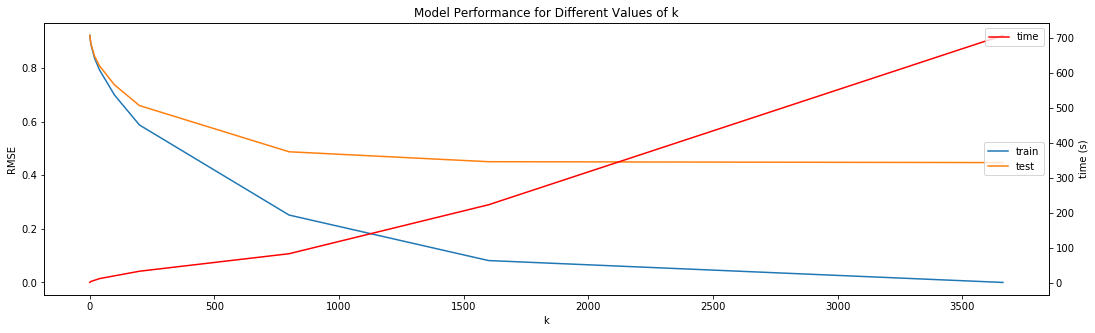

In [35]:
import matplotlib.pyplot as plt 
%matplotlib inline 

plt.figure(figsize=(18, 5))
plt.title('Model Performance for Different Values of k')
plt.ylabel('RMSE'); plt.xlabel('k')
plt.plot(k_vals, train_rmse_list, label='train')
plt.plot(k_vals, test_rmse_list, label='test')
plt.legend(loc='center right')

plt.twinx()
plt.ylabel('time (s)')
plt.plot(k_vals, time_list, c='r', label='time')
plt.legend(loc='upper right')
plt.show()